In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import glob
import pickle

data={'Sa': [], 'Pe':[], 'Wa':[]}
for m in ["Sa", "Pe", "Wa"]:
    files = np.sort(glob.glob('../Data/new/%s*.mat' %m))
    for f in files:
        data[m].append(loadmat(f))
        print(f)

../Data/new/Sa191127.mat
../Data/new/Sa191202.mat
../Data/new/Sa191203.mat
../Data/new/Sa191204.mat
../Data/new/Sa191206.mat
../Data/new/Sa191207.mat
../Data/new/Sa191208.mat
../Data/new/Sa191209.mat
../Data/new/Sa191210.mat
../Data/new/Sa191211.mat
../Data/new/Sa191214.mat
../Data/new/Sa191221.mat
../Data/new/Sa191224.mat
../Data/new/Sa191226.mat
../Data/new/Sa191227.mat
../Data/new/Sa191228.mat
../Data/new/Pe180728.mat
../Data/new/Wa180207.mat
../Data/new/Wa180209.mat
../Data/new/Wa180210.mat
../Data/new/Wa180211.mat
../Data/new/Wa180218.mat
../Data/new/Wa180219.mat
../Data/new/Wa180220.mat
../Data/new/Wa180221.mat
../Data/new/Wa180222.mat
../Data/new/Wa180227.mat


In [2]:
#import pickle
#with open('filename.pickle', 'wb') as handle:
#    pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [3]:
left_idx = {'Sa': [[] for i in range(len(data['Sa']))], 'Pe':[[] for i in range(len(data['Pe']))], 'Wa':[[] for i in range(len(data['Wa']))]}
right_idx = {'Sa': [[] for i in range(len(data['Sa']))], 'Pe':[[] for i in range(len(data['Pe']))], 'Wa':[[] for i in range(len(data['Wa']))]}
for m in ["Sa", "Pe", "Wa"]:
    for n in range(len(data[m])):
        left_idx[m][n] = data[m][n]['left_idx']
        right_idx[m][n] = data[m][n]['right_idx']

In [4]:
import pickle

idx = {'left': left_idx, 'right':right_idx}
with open('../Data/new/leftRightIdx.pickle', 'wb') as handle:
    pickle.dump(idx, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [5]:
dataset=[]
monkey=[]
session=[]
for m in ['Sa','Pe','Wa']:
    for n in range(len(data[m])):
        for line in data[m][n]['dat'][0]: 
            #[print(row) if any([row.shape==(0,0), not isinstance(row, np.ndarray)]) else print(row.flat[0]) if len(row[0])==1 else print(row[0]) for row in line]
            dataset.append([row if any([row.shape==(0,0), not isinstance(row, np.ndarray)]) else row.flat[0] if len(row[0])==1 else row[0] for row in line])
            monkey.append(m)
            session.append(n)


columns = ['trial_id','sp_train', 'outcome', 'timing', 'targ_xy', 'targ_angle', 'saccade_xy', 'saccade_angle']

df_dat = pd.DataFrame(dataset, columns=columns)
df_dat['monkey'] = monkey
df_dat['session'] = session


In [6]:
taskperiods = ['start', 'fix', 'targ_on', 'targ_off', 'go_cue', 'saccade', 'reward']

helper = [np.squeeze(np.concatenate(df_dat['timing'][n])) if len(df_dat['timing'][n])>1 else np.squeeze(df_dat['timing'][n]) for n in df_dat.index]
df_dat['timing']=[np.append(helper[n], np.ones(len(taskperiods)-len(df_dat['timing'][n]))*max(helper[n])) if len(df_dat['timing'][n])<len(taskperiods) else helper[n] for n in df_dat.index]
for i in range(len(taskperiods)):
    df_dat[taskperiods[i]] = [line[i].flat[0] for line in df_dat['timing']]
del df_dat['timing']

df_dat['trial_end'] = [df_dat['sp_train'][n].shape[1] for n in df_dat.index]

In [7]:
df_dat.head()

,trial_id,sp_train,outcome,targ_xy,targ_angle,saccade_xy,saccade_angle,monkey,session,start,fix,targ_on,targ_off,go_cue,saccade,reward,trial_end
0,1,"(84, 0)\t1.0\n (151, 0)\t1.0\n (131, 1)\t1...",CORRECT,"[-144.24978336205572, -144.2497833620557]",225.0,"[-202.51168991556725, -156.600050070819]",217.714,Sa,0,1.0,399.0,617.0,1037.0,3557.0,3792.0,3902.0,4708
1,2,"(1, 0)\t1.0\n (40, 0)\t1.0\n (47, 0)\t1.0\...",BROKE_FIX,"[-144.2497833620557, 144.2497833620557]",135.0,[],[],Sa,0,1.0,60.0,118.0,118.0,118.0,118.0,118.0,2195
2,3,"(96, 0)\t1.0\n (2, 1)\t1.0\n (27, 1)\t1.0\...",CORRECT,"[-204.0, 2.4982794702606005e-14]",180.0,"[-240.39767772191422, 9.213561861581889]",177.805,Sa,0,1.0,164.0,383.0,803.0,3223.0,3404.0,3514.0,4289
3,4,"(86, 0)\t1.0\n (10, 1)\t1.0\n (61, 1)\t1.0...",CORRECT,"[144.24978336205567, -144.24978336205572]",315.0,"[102.73301126865537, -178.07357726031987]",299.981,Sa,0,1.0,170.0,383.0,803.0,2823.0,3014.0,3126.0,3901
4,5,"(0, 0)\t1.0\n (91, 0)\t1.0\n (136, 1)\t1.0...",CORRECT,"[-144.2497833620557, 144.2497833620557]",135.0,"[-123.19725250092596, 120.2654764951257]",135.69,Sa,0,1.0,64.0,282.0,702.0,2822.0,3002.0,3117.0,3889


#### Change WM circle so that 0 at top, also change x,y respectively

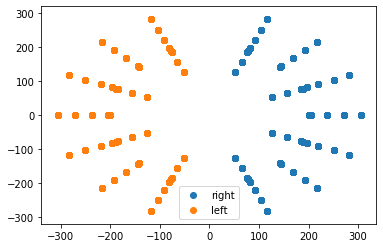

In [8]:
import matplotlib.pyplot as plt
compl = np.array([complex(df_dat['targ_xy'][n][0],df_dat['targ_xy'][n][1]) for n in df_dat.index])
compl_real = np.array([complex(df_dat['targ_xy'][n][0],df_dat['targ_xy'][n][1]).real for n in df_dat.index])
compl_imag = np.array([complex(df_dat['targ_xy'][n][0],df_dat['targ_xy'][n][1]).imag for n in df_dat.index])
bool_targright = ((np.angle(compl)>-np.pi/2) & (np.angle(compl)<np.pi/2))
bool_targleft = ((np.angle(compl)>np.pi/2) | (np.angle(compl)<-np.pi/2-0.1))
plt.scatter(compl_real[bool_targright], compl_imag[bool_targright], label='right')
plt.scatter(compl_real[bool_targleft], compl_imag[bool_targleft], label='left')
plt.legend()

In [9]:
help_circle = np.zeros(len(df_dat))
help_circle_sac = np.zeros(len(df_dat))
for idx in range(len(df_dat)):
    if df_dat.targ_angle[idx]<90:
        help_circle[idx] = df_dat.targ_angle[idx]+270
    elif df_dat.targ_angle[idx]==90:
        help_circle[idx] = 0
    elif df_dat.targ_angle[idx]>90:
        help_circle[idx] = df_dat.targ_angle[idx]-90
    elif isinstance(df_dat.targ_angle[idx], np.ndarray):
        help_circle[idx] = np.nan
    else:
        print('error')
        
    if df_dat.saccade_angle[idx]<90:
        help_circle_sac[idx] = df_dat.saccade_angle[idx]+270
    elif df_dat.saccade_angle[idx]==90:
        help_circle_sac[idx] = 0
    elif df_dat.saccade_angle[idx]>90:
        help_circle_sac[idx] = df_dat.saccade_angle[idx]-90
    elif isinstance(df_dat.saccade_angle[idx], np.ndarray):
        help_circle_sac[idx] = np.nan
    else:
        print('error')

df_dat['targ_angle'] = help_circle
df_dat['saccade_angle'] = help_circle_sac
    

/home/melanie/anaconda3/envs/brian2/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  from ipykernel import kernelapp as app
/home/melanie/anaconda3/envs/brian2/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
/home/melanie/anaconda3/envs/brian2/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


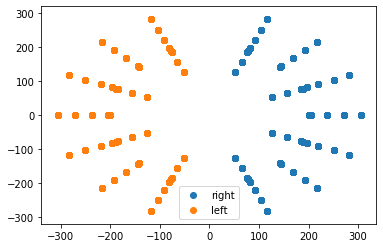

In [10]:
import matplotlib.pyplot as plt
compl = np.array([complex(df_dat['targ_xy'][n][0],df_dat['targ_xy'][n][1]) for n in df_dat.index])
compl_real = np.array([complex(df_dat['targ_xy'][n][0],df_dat['targ_xy'][n][1]).real for n in df_dat.index])
compl_imag = np.array([complex(df_dat['targ_xy'][n][0],df_dat['targ_xy'][n][1]).imag for n in df_dat.index])
bool_targright = ((np.angle(compl)>-np.pi/2) & (np.angle(compl)<np.pi/2))
bool_targleft = ((np.angle(compl)>np.pi/2) | (np.angle(compl)<-np.pi/2-0.1))
plt.scatter(compl_real[bool_targright], compl_imag[bool_targright], label='right')
plt.scatter(compl_real[bool_targleft], compl_imag[bool_targleft], label='left')
plt.legend()

In [8]:
import sys

np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None) 
import pickle
with open('../Data/new/df.pickle', 'wb') as handle:
    pickle.dump(df_dat, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [8]:
#import sys

#np.set_printoptions(threshold=sys.maxsize)
#pd.set_option('display.max_colwidth', None)
#pd.set_option('display.max_columns', None) 
#df_dat.to_csv('../Data/df_monkeys.csv', index=False)